# Exploratory Data Analysis 
Here we look at the raw data, its shape, outliers and the relationship between the different variables.

In [10]:
import pandas as pd
train =pd.read_csv('train.csv')
old_trans=pd.read_csv('historical_transactions.csv')
new_trans=pd.read_csv('new_merchant_transactions.csv')
merchants=pd.read_csv('merchants.csv')

def dataset_info(df):
    print(f"Size: {df.size}\n")
    print(f"Shape: {df.shape}\n")
    print(f"Columns: {df.columns.tolist()}\n")
    print(f"Data Types: \n{df.dtypes}\n")
    print(f"Null Values: \n{df.isna().count()}\n")
    print(f"Basic Statistics:\n {df.describe()}\n")

print("------------DATASET INFO-------------")
print("TRAIN")
dataset_info(train)
print("-------------------------------------")
print("MERCHANTS")
dataset_info(merchants)
print("-------------------------------------")
print("NEW TRANSACTIONS")
dataset_info(new_trans)
print("-------------------------------------")
print("OLD TRANSACTIONS")
dataset_info(old_trans)
print("-------------------------------------")


------------DATASET INFO-------------
TRAIN
Size: 1211502

Shape: (201917, 6)

Columns: ['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target']

Data Types: 
first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

Null Values: 
first_active_month    201917
card_id               201917
feature_1             201917
feature_2             201917
feature_3             201917
target                201917
dtype: int64

Basic Statistics:
            feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%

In [ ]:
#continuous features: plot histograms
#for feature 1,2 and 3: look at correlation with target?

## Train Dataset EDA
The train dataset has the columns 'target' (our target variable), 'card_id', 'feature_1', 'feature_2' and 'feature_3'. Features 1,2 and 3 are anonymized categorical features of the cards. 'target' is the loyalty numerical score calculated 2 months after historical and evaluation period.

In [11]:
#Basic statistics of the train dataset
train.describe()


,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


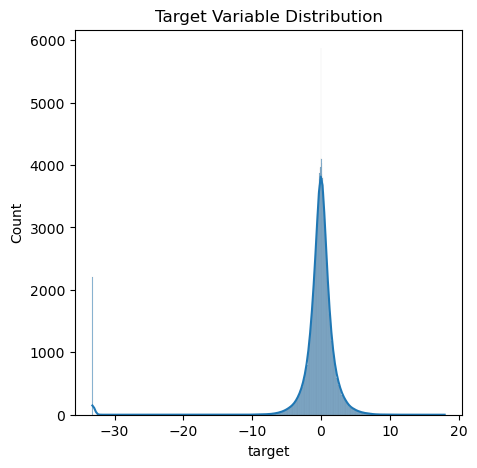

In [13]:
#Exploring distribution of the target variable

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.histplot(train['target'], kde=True)
plt.title('Target Variable Distribution')
plt.show()

<Axes: ylabel='target'>

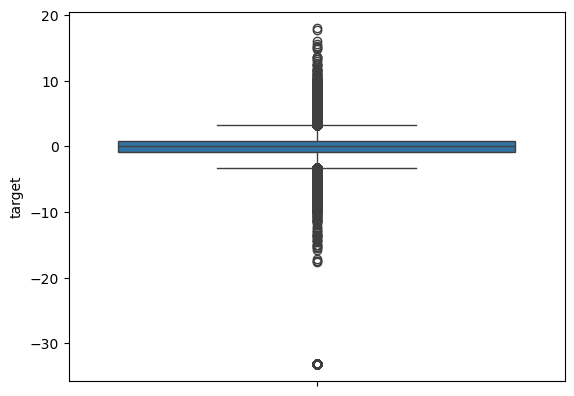

In [14]:
sns.boxplot(train['target'])

Here we observe that target has a fairly normal distribution with some outliers. Majority of the values of target are between -10 and 10. Most outliers lie below -30.

In [61]:
outliers=train[train['target']<-30]
outliers

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281
...,...,...,...,...,...,...
201169,2016-07,C_ID_e34ea29439,2,2,0,-33.219281
201262,2017-10,C_ID_081082a629,5,2,1,-33.219281
201368,2016-08,C_ID_6f61bed11c,3,3,1,-33.219281
201519,2017-05,C_ID_d6c86b18cd,2,1,0,-33.219281


### Outliers
Therefore there are around 2207 cards that count as outliers. Given the total number of elements in the dataset are 201917, this brings us to around **1.09% of the total dataset**.

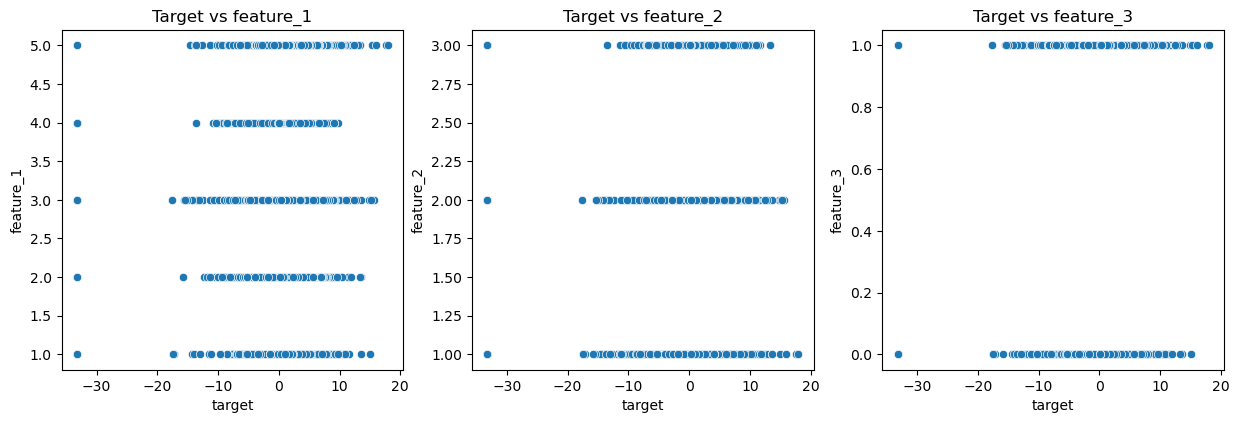

In [27]:
#Looking at target versus different feature in the train dataset
plt.figure(figsize=(15, 15))
for i, feature in enumerate(['feature_1', 'feature_2', 'feature_3']):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='target', y=feature, data=train)
    plt.title(f'Target vs {feature}')

An important observation here is that feature 1, 2 and 3 have discrete values regardless of the value of target. The values are precisely aligned at certain levels without the variation that one would expect of numerical or continous data. 

These characteristics reinforce the fact that features 1, 2 and 3 categorical variables, which could represent:
* Discrete ratings or levels
* Classifications or categories
* Binary flags (especially feature_3, which appears to be 0/1)

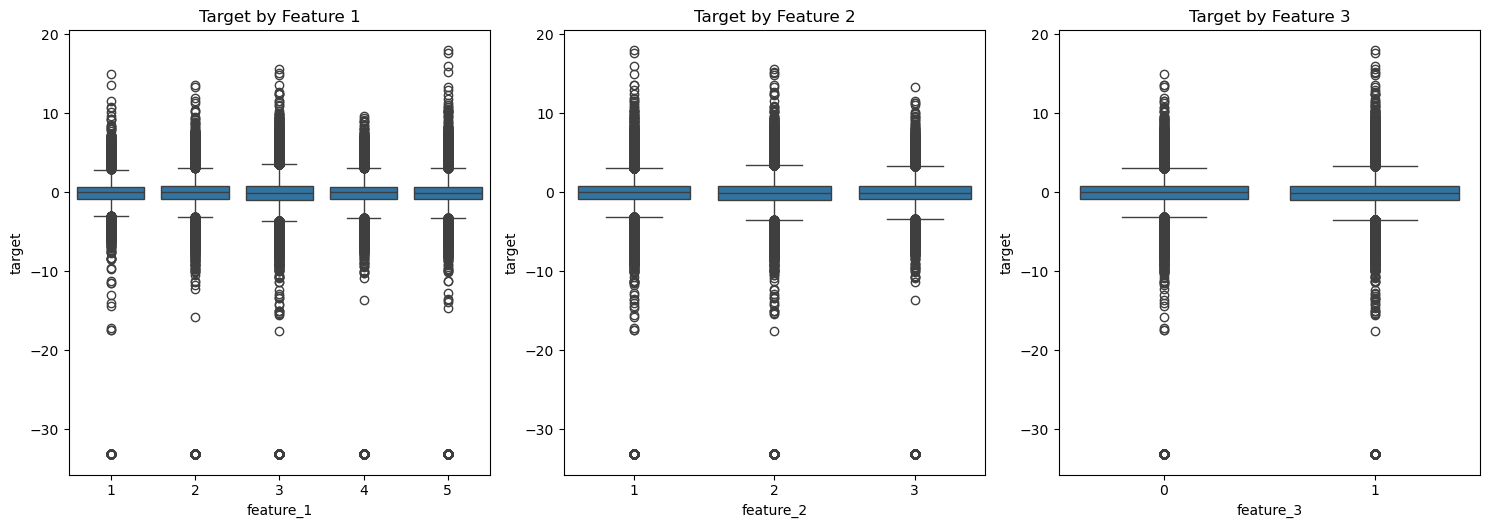

In [28]:
#Analysing target feature's relation with the other features

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='feature_1', y='target', data=train)
plt.title('Target by Feature 1')

plt.subplot(3, 3, 2)
sns.boxplot(x='feature_2', y='target', data=train)
plt.title('Target by Feature 2')

plt.subplot(3, 3, 3)
sns.boxplot(x='feature_3', y='target', data=train)
plt.title('Target by Feature 3')

plt.tight_layout()
plt.show()

The distribution of target across the different values of features 1, 2 and 3 seems to be fairly uniform. All of them seem to have medians around 0 and similar interquartile ranges. There doesn't appear to be a strong relationship between any single feature and the target variable, which means these individual features alone may not be strong predictors of target. This means we need to further explore feature interactions, such as the relation between feature_1, feature_2 and feature_3.

To explore the interactions between feature_1, feature_2, feature_3 and target, we can use a decision tree. Observing where the tree splits can help us understand the correlation between different features and determine the importance of the features wrt target.

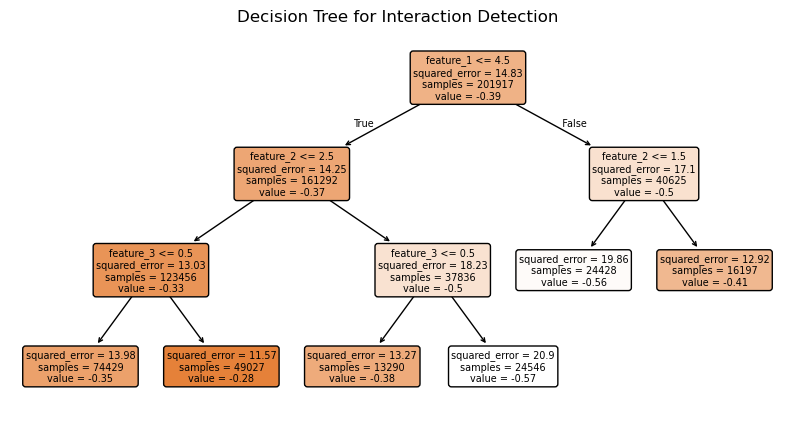

Feature Importance:
     Feature  Importance
1  feature_2    0.519552
0  feature_1    0.263911
2  feature_3    0.216537


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)
X = train[['feature_1', 'feature_2', 'feature_3']]
y = train['target']
tree.fit(X, y)

plt.figure(figsize=(10, 5))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, 
          fontsize=7, precision=2)
plt.title('Decision Tree for Interaction Detection')
plt.show()

#Extracting feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)
print("Feature Importance:")
print(importance)

We observe that feature_2 is most important here.

* The lowest squared error (11.57) appears in a leaf node where feature_1 <= 4.5, feature_2 <= 2.5, and feature_3 <= 0.5, with value = -0.28
* The highest squared error (20.9) is in a branch where feature_3 > 0.5
* The sample sizes vary significantly across nodes, with the root containing 201,917 samples.

Feature interaction is important, since, when feature_1 ≤ 4.5, the model examines feature_2 with a threshold of 2.5. But when feature_1 > 4.5, it uses a different threshold (1.5) for feature_2. This suggests these features don't act independently but work together to predict the target.

# Analysing Transaction Data

Here we have two datasets for transactions: historical_transactions.csv (here called old_trans) and new_merchant_transactions.csv (here called new_trans). We will examine the columns in both these datasets and merge based on card_id. Then we will carry out EDA.

In [67]:
new_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [70]:
old_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [71]:
transactions=pd.concat([new_trans,old_trans])
transactions


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,NaN,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,NaN,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9


In [72]:
print("OLD : ",old_trans.shape)
print("NEW : ",new_trans.shape)
print("total : ",transactions.shape)


OLD :  (29112361, 14)
NEW :  (1963031, 14)
total :  (31075392, 14)


The two datasets have been merged correctly.

In [76]:
transactions.dtypes

authorized_flag                 object
card_id                         object
city_id                          int64
category_1                      object
installments                     int64
category_3                      object
merchant_category_id             int64
merchant_id                     object
month_lag                        int64
purchase_amount                float64
purchase_date           datetime64[ns]
category_2                     float64
state_id                         int64
subsector_id                     int64
dtype: object

In [84]:
import numpy as np
transactions["authorized_flag"] = np.where(transactions["authorized_flag"].str.contains("Y"), 1, 0)

In [85]:
import datetime as dt
import numpy as np
import logging

if 'purchase_date' in transactions.columns:
    transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

logging.info(msg="converted purchase date to datetime format")

agg_dict = {
    'purchase_amount': ['count', 'sum', 'mean', 'std', 'min', 'max'],
    'installments': ['mean', 'max', 'sum'],
    
    #Categorical cols
    'merchant_category_id': ['nunique', lambda x: x.value_counts().index[0] if len(x) > 0 else np.nan],
    'merchant_id': ['nunique'],
    
    #flags
    'authorized_flag': ['sum'], 
    
    #temporal calulations
    'month_lag': ['min', 'max']
}

#group and aggregate
agg_data = transactions.groupby('card_id').agg(agg_dict)

#Flatten column names
agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns.values]

if 'merchant_category_id_<lambda>' in agg_data.columns:
    agg_data.rename(columns={
        'merchant_category_id_<lambda>': 'merchant_category_id_most_frequent',
        'city_id_<lambda>': 'city_id_most_frequent',
        'state_id_<lambda>': 'state_id_most_frequent',
        'subsector_id_<lambda>': 'subsector_id_most_frequent'
    }, inplace=True)

if 'purchase_date' in transactions.columns:
    
    date_range = transactions.groupby('card_id')['purchase_date'].agg(['min', 'max'])
    agg_data['days_active'] = (date_range['max'] - date_range['min']).dt.days

    
    transactions['day_of_week'] = transactions['purchase_date'].dt.dayofweek
    transactions['is_weekend'] = transactions['day_of_week'].isin([5, 6]).astype(int)
    transactions['hour'] = transactions['purchase_date'].dt.hour
    
    day_hour_agg = transactions.groupby('card_id').agg({
        'is_weekend': 'mean',  
        'day_of_week': lambda x: x.value_counts().index[0],  
        'hour': lambda x: x.value_counts().index[0]  
    })
    
    day_hour_agg.columns = ['weekend_ratio', 'most_common_day', 'most_common_hour']
    agg_data = pd.concat([agg_data, day_hour_agg], axis=1)


if 'days_active' in agg_data.columns and agg_data['days_active'].max() > 0:
    agg_data['transaction_frequency'] = agg_data['purchase_amount_count'] / agg_data['days_active'].replace(0, 1)


agg_data['avg_purchase_per_transaction'] = agg_data['purchase_amount_sum'] / agg_data['purchase_amount_count']

agg_data.reset_index()

,card_id,purchase_amount_count,purchase_amount_sum,purchase_amount_mean,purchase_amount_std,purchase_amount_min,purchase_amount_max,installments_mean,installments_max,installments_sum,...,merchant_id_nunique,authorized_flag_sum,month_lag_min,month_lag_max,days_active,weekend_ratio,most_common_day,most_common_hour,transaction_frequency,avg_purchase_per_transaction
0,C_ID_00007093c1,151,-78.173565,-0.517706,0.296638,-0.728876,1.507069,1.284768,6,194,...,31,116,-12,2,419,0.165563,0,16,0.360382,-0.517706
1,C_ID_0001238066,149,-87.297257,-0.585888,0.186974,-0.740897,0.768095,1.610738,10,240,...,90,146,-5,2,213,0.429530,5,19,0.699531,-0.585888
2,C_ID_0001506ef0,68,-36.049233,-0.530136,0.466421,-0.740491,1.493545,0.014706,1,1,...,29,64,-13,1,431,0.470588,5,12,0.157773,-0.530136
3,C_ID_0001793786,247,-37.015633,-0.149861,0.850432,-0.745405,4.554145,0.020243,1,5,...,150,220,-9,2,344,0.206478,3,13,0.718023,-0.149861
4,C_ID_000183fdda,155,-75.428717,-0.486637,0.508951,-0.737892,2.764788,1.806452,10,280,...,84,148,-6,2,266,0.225806,3,22,0.582707,-0.486637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325535,C_ID_ffff1d9928,16,-9.938024,-0.621127,0.216340,-0.746893,0.004418,1.687500,10,27,...,12,13,-4,2,176,0.187500,0,14,0.090909,-0.621127
325536,C_ID_ffff579d3a,115,-80.957030,-0.703974,0.042034,-0.739244,-0.491457,0.026087,1,3,...,63,100,-6,1,224,0.191304,2,12,0.513393,-0.703974
325537,C_ID_ffff756266,25,-5.127842,-0.205114,0.520700,-0.746156,1.206403,3.160000,12,79,...,14,15,-13,2,440,0.080000,3,8,0.056818,-0.205114
325538,C_ID_ffff828181,198,-125.063404,-0.631633,0.108552,-0.745405,0.109528,1.202020,4,238,...,97,174,-13,2,479,0.237374,4,19,0.413361,-0.631633


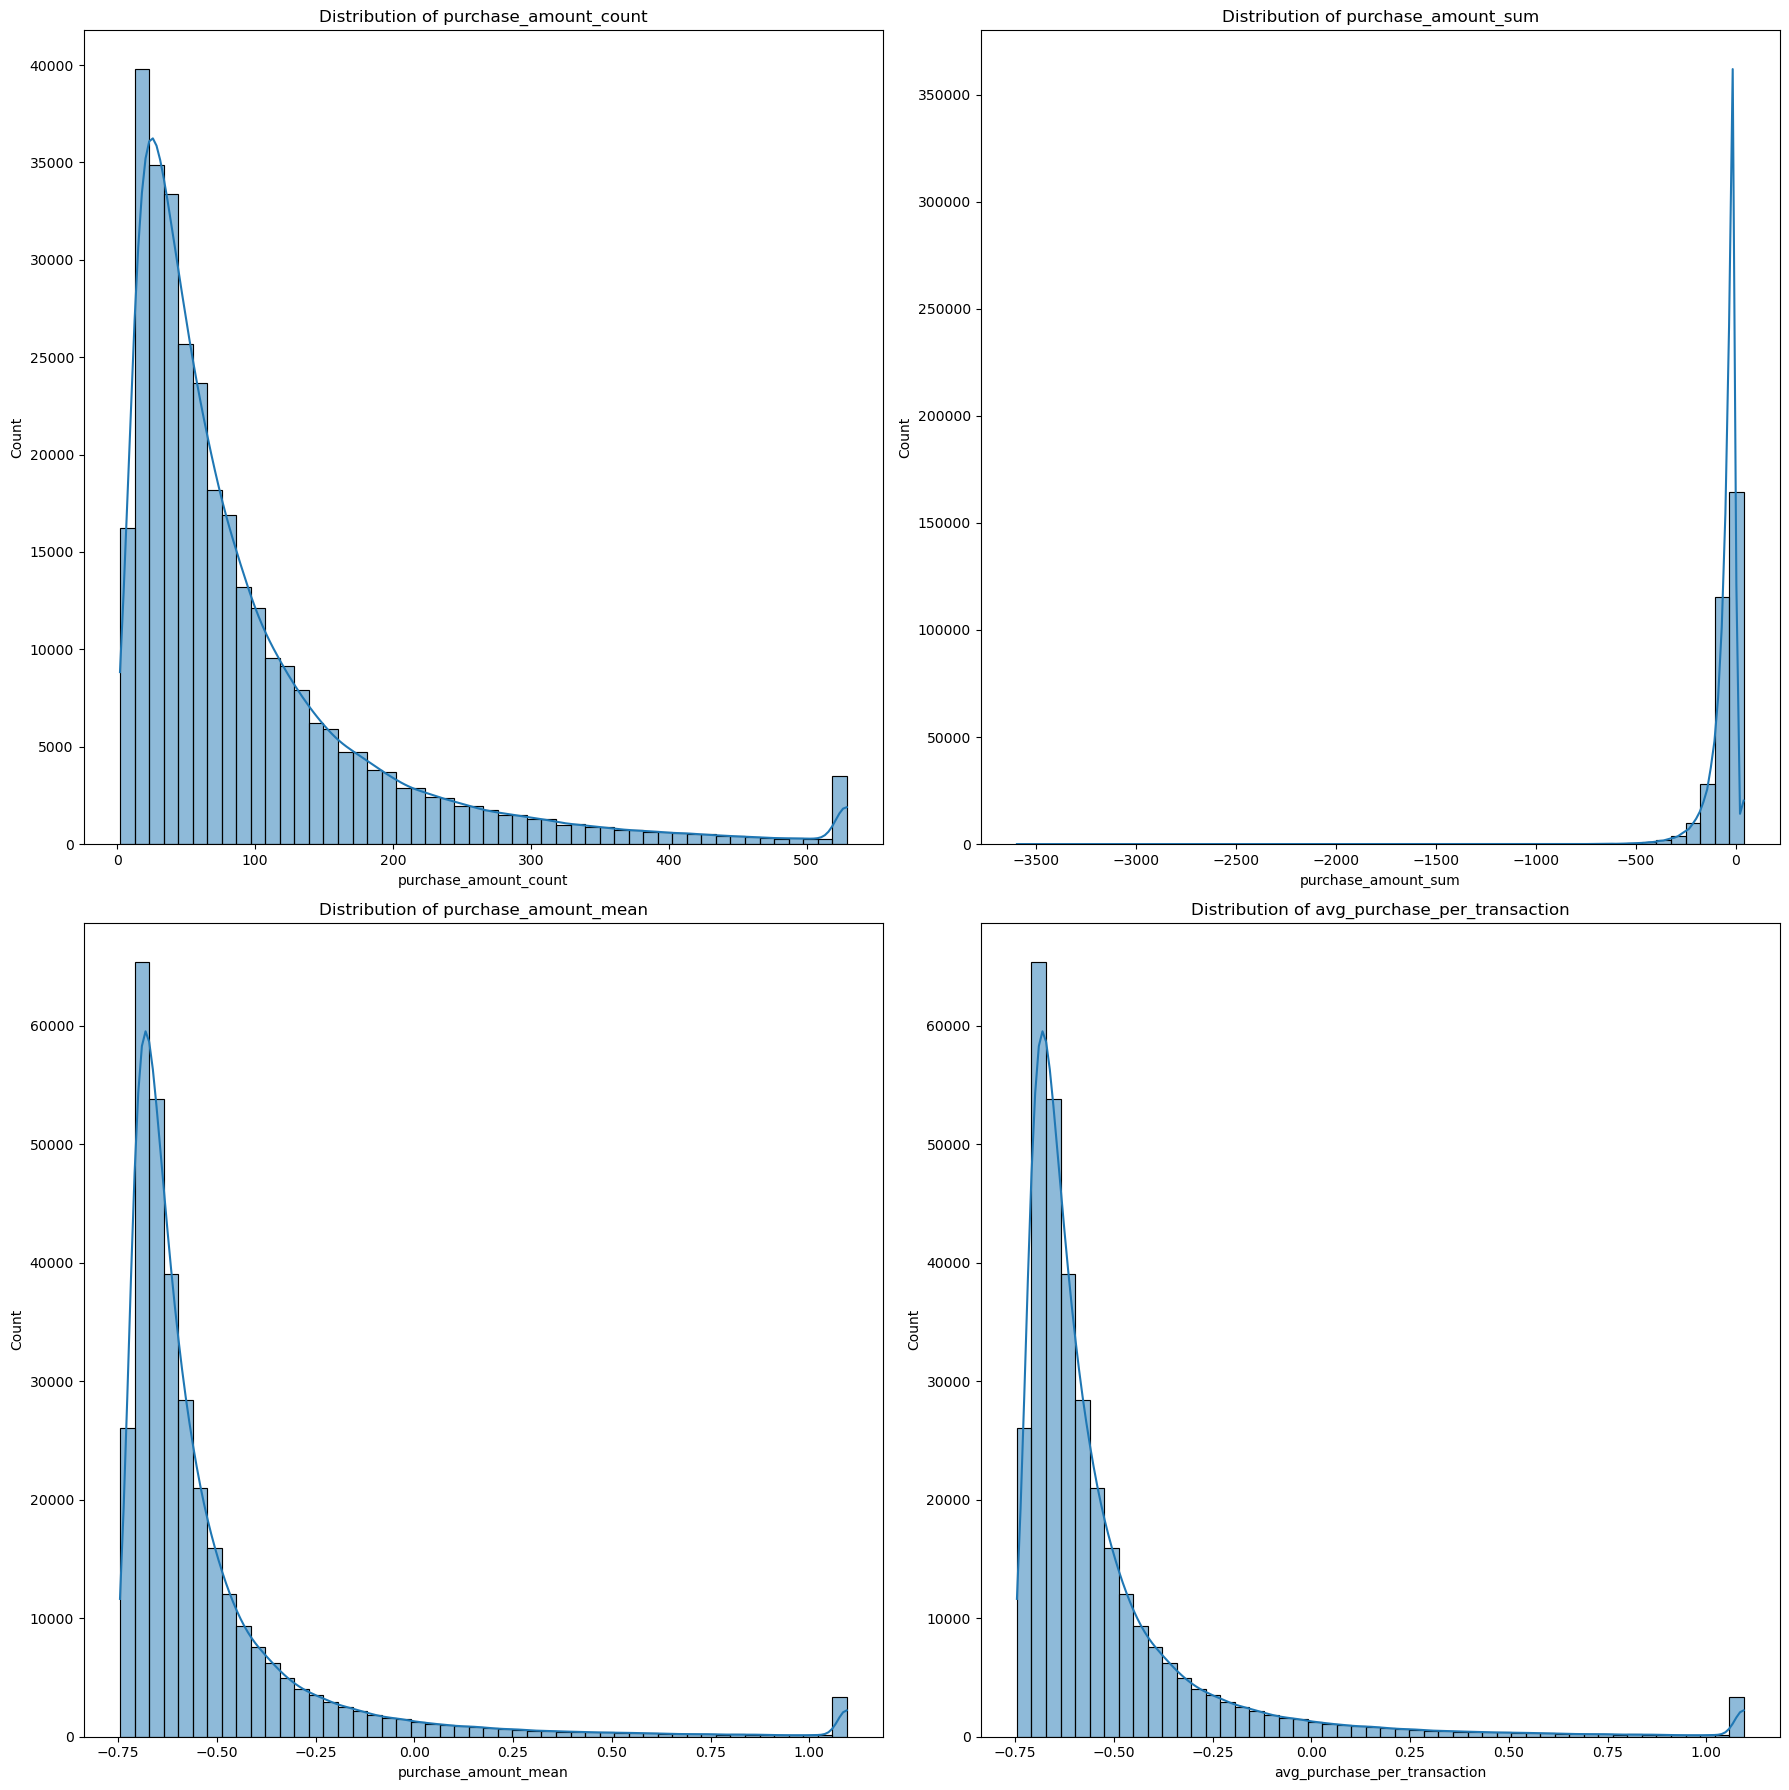

In [94]:
#Generating some key graphs related to transactions
if train is not None and 'target' in train.columns:
    agg_trans = agg_data.merge(train[['card_id', 'target']], on='card_id', how='left') #Merged train and transactions on card id
    
metrics = ['purchase_amount_count', 'purchase_amount_sum', 'purchase_amount_mean', 
               'avg_purchase_per_transaction']
    
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if i < len(axes):
        # Plot with log scale for better visualization
        sns.histplot(agg_trans[metric].clip(upper=agg_trans[metric].quantile(0.99)), 
                    kde=True, ax=axes[i],bins=50)
        axes[i].set_title(f'Distribution of {metric}')
        axes[i].set_xlabel(metric)

plt.tight_layout()
plt.savefig('transaction_distributions.png')
plt.show()
plt.close()

We notice that the data for purchase amount (count, sum, mean and average purchase per transaction) is skewed with a few outliers.

### Analysing categorical features

In [97]:
agg_trans.dtypes

card_id                             object
purchase_amount_count                int64
purchase_amount_sum                float64
purchase_amount_mean               float64
purchase_amount_std                float64
purchase_amount_min                float64
purchase_amount_max                float64
installments_mean                  float64
installments_max                     int64
installments_sum                     int64
merchant_category_id_nunique         int64
merchant_category_id_<lambda_0>      int64
merchant_id_nunique                  int64
authorized_flag_sum                  int64
month_lag_min                        int64
month_lag_max                        int64
days_active                          int64
weekend_ratio                      float64
most_common_day                      int32
most_common_hour                     int32
transaction_frequency              float64
avg_purchase_per_transaction       float64
target                             float64
dtype: obje

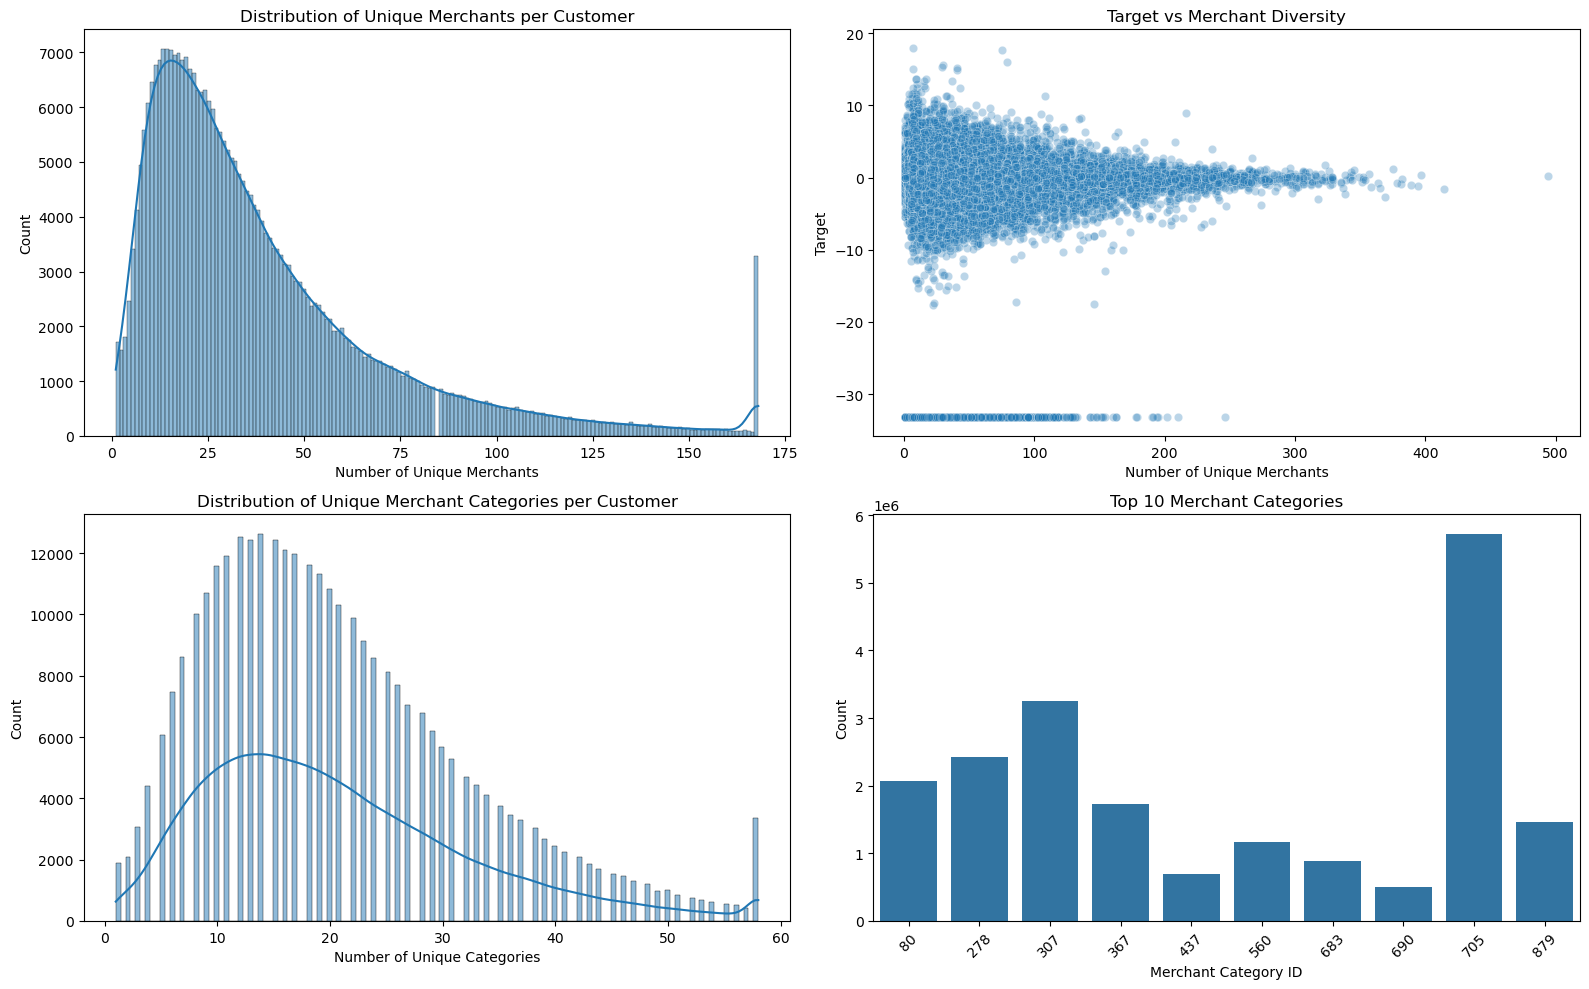

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

#unique Merchants per Customer
sns.histplot(
    agg_trans['merchant_id_nunique'].clip(upper=agg_trans['merchant_id_nunique'].quantile(0.99)),
    kde=True, ax=axes[0]
)
axes[0].set_title('Distribution of Unique Merchants per Customer')
axes[0].set_xlabel('Number of Unique Merchants')

#target vs Merchant Diversity
if 'target' in agg_trans.columns:
    sns.scatterplot(
        x='merchant_id_nunique',
        y='target',
        data=agg_trans,
        alpha=0.3,
        ax=axes[1]
    )
    axes[1].set_title('Target vs Merchant Diversity')
    axes[1].set_xlabel('Number of Unique Merchants')
    axes[1].set_ylabel('Target')
else:
    axes[1].axis('off')  # If target not present, hide this plot

#distribution of Unique Merchant Categories per Customer
if 'merchant_category_id_nunique' in agg_trans.columns:
    sns.histplot(
        agg_trans['merchant_category_id_nunique'].clip(
            upper=agg_trans['merchant_category_id_nunique'].quantile(0.99)),
        kde=True,
        ax=axes[2]
    )
    axes[2].set_title('Distribution of Unique Merchant Categories per Customer')
    axes[2].set_xlabel('Number of Unique Categories')
else:
    axes[2].axis('off')

#top 10 Merchant Categories
if 'merchant_category_id' in transactions.columns:
    top_categories = transactions['merchant_category_id'].value_counts().head(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[3])
    axes[3].set_title('Top 10 Merchant Categories')
    axes[3].set_xlabel('Merchant Category ID')
    axes[3].set_ylabel('Count')
    axes[3].tick_params(axis='x', rotation=45)
else:
    axes[3].axis('off')

plt.tight_layout()
plt.show()


### Some observations from the above graphs:

* **Distribution of Unique Merchants per customer**: 
    Heavily right-skewed distribution: most customers shop with <50 merchants. A spike at the far right suggests a lot of customers hit the clipping threshold or have unusually high merchant diversity. Majority of customers are 'loyal' to a small group of merchants.

* **Target vs Merchant Diversity**: 
    Wide spread for low merchant counts, but variance narrows with more merchants. Flat trend suggests little linear correlation between merchant diversity and target (unless you zoom in). A cluster of low-merchant, low-target users might represent disengaged or inactive customers. Outliers (e.g., high diversity, low target) might be inefficient or loss-making customers.

* **Top 10 Merchant Categories**: 
    One category (705) dominates usage. Could be a supermarket, food delivery, or transport.

* **Distribution of Unique Merchant Categories per Customer**: 
    Slightly skewed distribution suggests most customers shop within the 0-30 categories of merchants range. This suggests there are a few popular categories among the group of customers. A small group of customers shop at >50 categories.

### Outlier vs Non-outlier behaviour
We observe that the merchant data behaves differently for target outliers and non-outliers. For example, in the graphs above, in 'Target vs Merchant Diversity', when target is <-30, the distribution behaves differently than the rest of the data.

## Analysing Time Related Features

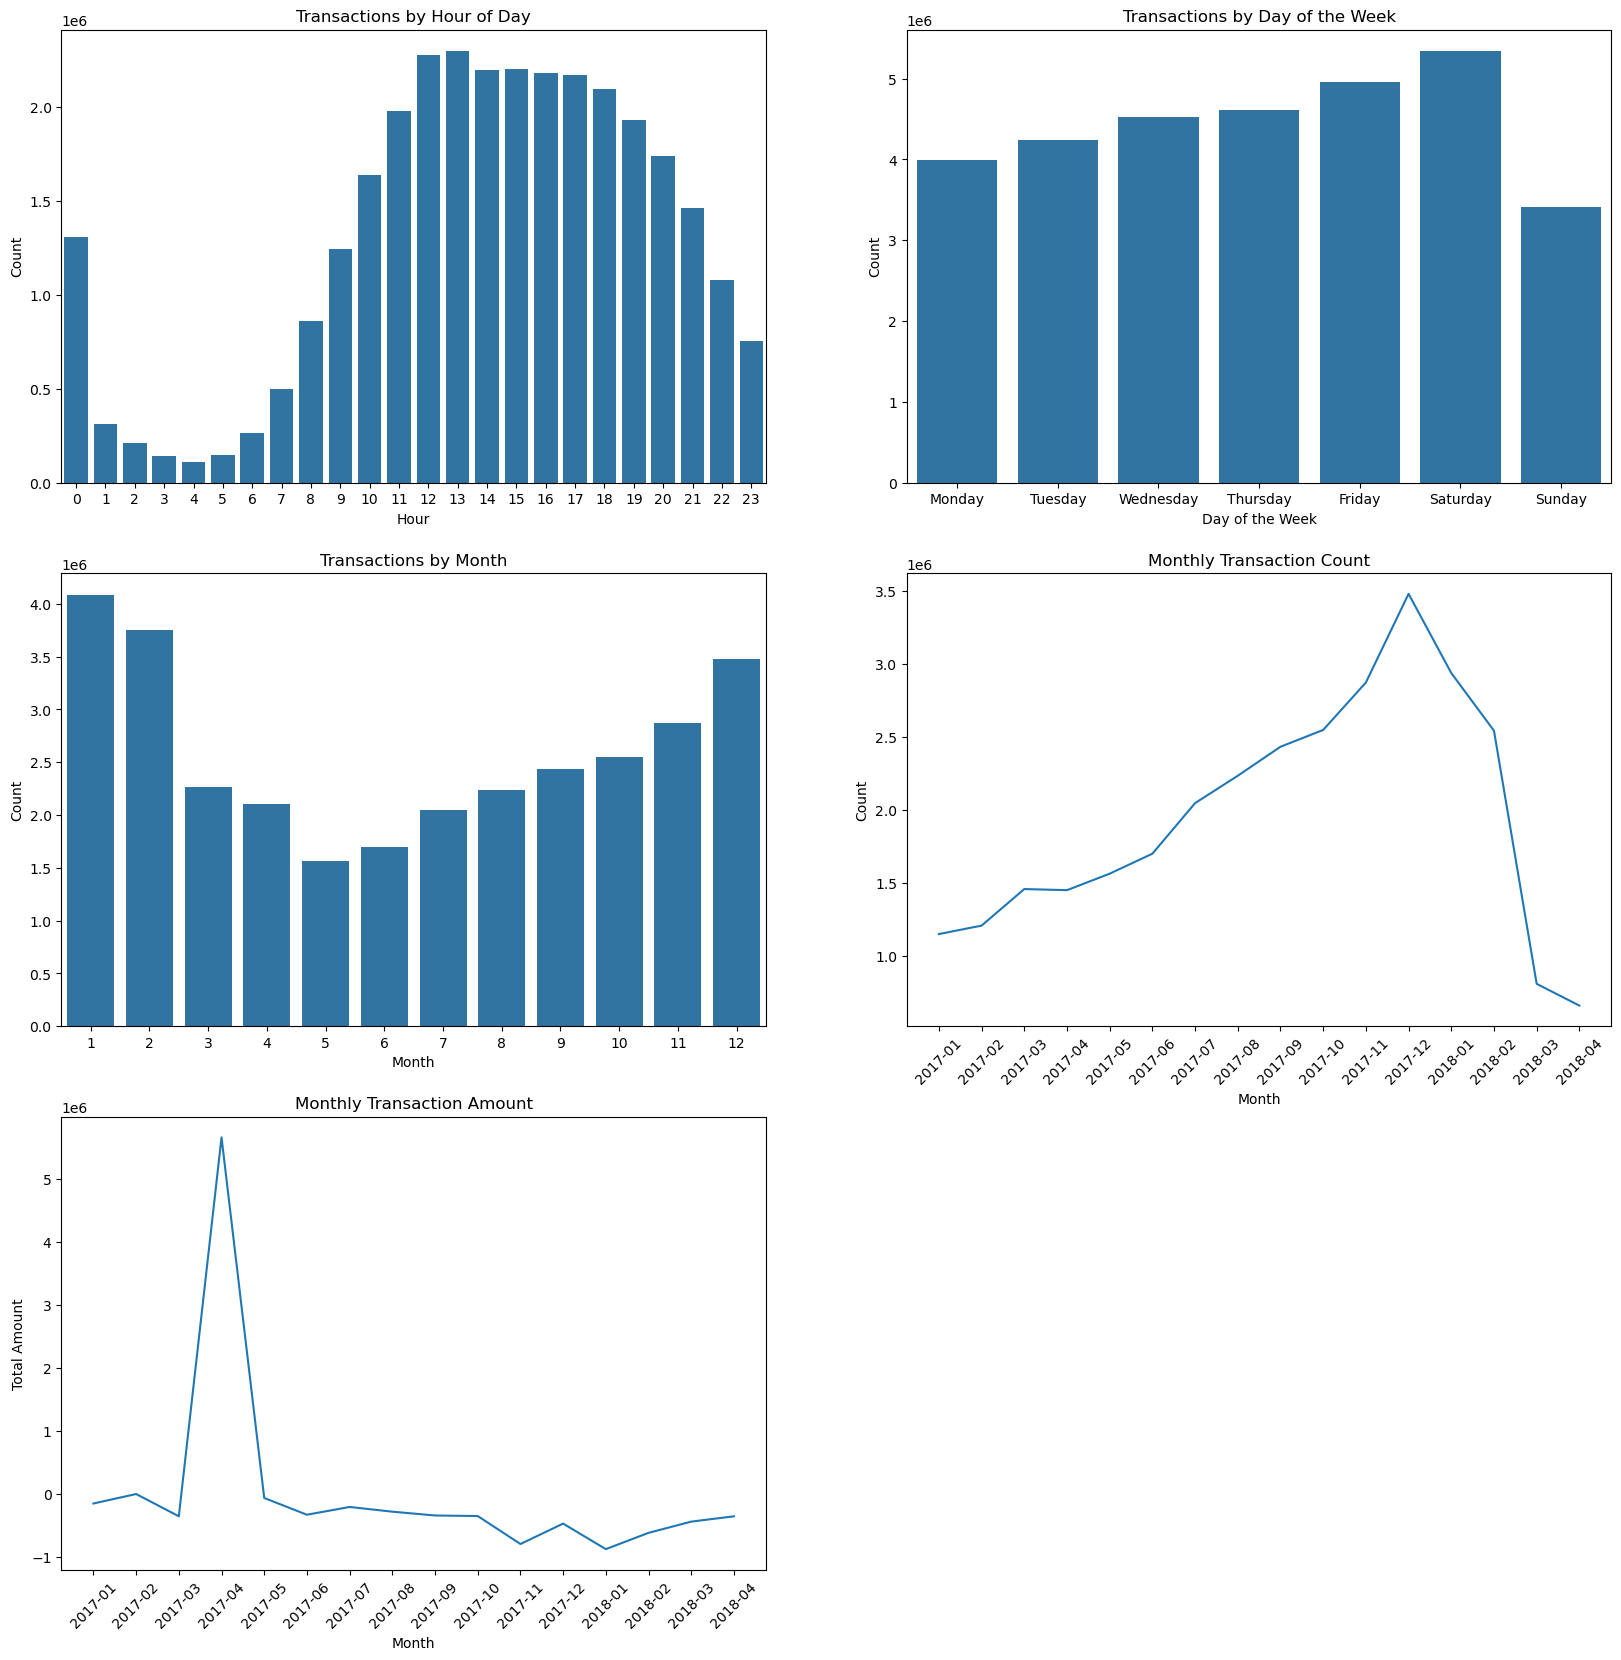

In [113]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

transactions['hour'] = transactions['purchase_date'].dt.hour
transactions['day_of_week'] = transactions['purchase_date'].dt.dayofweek
transactions['month'] = transactions['purchase_date'].dt.month
transactions['year'] = transactions['purchase_date'].dt.year

fig,axes=plt.subplots(3,2,figsize=(20,20))
axes=axes.flatten()

#hour of day 
sns.countplot(x='hour', data=transactions,ax=axes[0])
axes[0].set_title('Transactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

#day of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=transactions,ax=axes[1])

axes[1].set_title('Transactions by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)


#month
sns.countplot(x='month', data=transactions,ax=axes[2])
axes[2].set_title('Transactions by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')


#time trends
transactions['year_month'] = transactions['purchase_date'].dt.to_period('M')
monthly_counts = transactions.groupby('year_month').size().reset_index(name='count')
monthly_amounts = transactions.groupby('year_month')['purchase_amount'].agg(['sum', 'mean']).reset_index()

#transaction counts
sns.lineplot(x=monthly_counts['year_month'].astype(str), y=monthly_counts['count'], ax=axes[3])
axes[3].set_title('Monthly Transaction Count')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=45)

#transaction amount
sns.lineplot(x=monthly_amounts['year_month'].astype(str), y=monthly_amounts['sum'], ax=axes[4])
axes[4].set_title('Monthly Transaction Amount')
axes[4].set_xlabel('Month')
axes[4].set_ylabel('Total Amount')
axes[4].tick_params(axis='x', rotation=45)

axes[5].axis('off')

plt.show()
plt.close()


### Temporal Insights
* **Transactions by Hour of Day:** Activity peaks during business hours (12–18h), with a notable secondary bump around midnight — possibly due to automated or scheduled transactions.

* **Transactions by Day of the Week:** Fairly consistent across weekdays, with a small increase on Saturdays, suggesting slightly higher consumer activity on weekends.

* **Transactions by Month:** Highest volumes occur in January and December, likely influenced by holiday spending and post-holiday financial activity like sales or refunds.

* **Monthly Transaction Count Trend:** A clear upward trend with a spike in December followed by a sharp drop, indicating strong seasonal effects and potential for demand forecasting.

* **Monthly Transaction Amount:** Unusual spike may indicate an outlier in that month that skews the data.